In [7]:
# Installation des dépendances
!pip install datasets torch emoji imbalanced-learn nltk matplotlib seaborn wordcloud sentence-transformers nlpaug

In [5]:
# Install the necessary NLTK package
!pip install nltk

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nlt

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks
Nombre total de tweets : 1118

Colonnes du dataset :
Index(['Unnamed: 0', 'tweet_id', 'text', 'science_related', 'scientific_claim',
       'scientific_reference', 'scientific_context', 'emotion_principale'],
      dtype='object')
Colonne des labels détectée : emotion_principale

Valeurs manquantes :
Unnamed: 0              0
tweet_id                0
text                    0
science_related         0
scientific_claim        0
scientific_reference    0
scientific_context      0
emotion_principale      0
dtype: int64

Distribution des émotions :
Peur          52
Colère       181
Joie         214
Surprise      91
Tristesse     64
Dégoût        46
Neutre       470
Name: count, dtype: int64


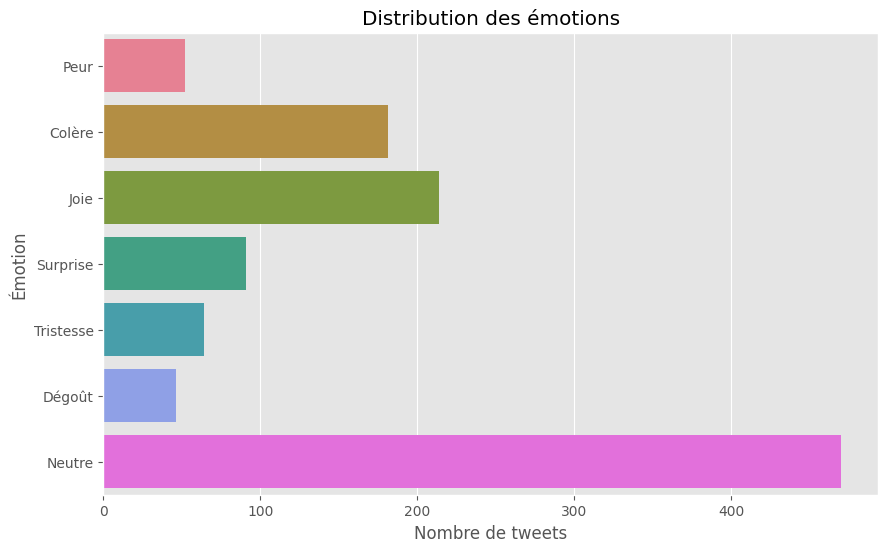

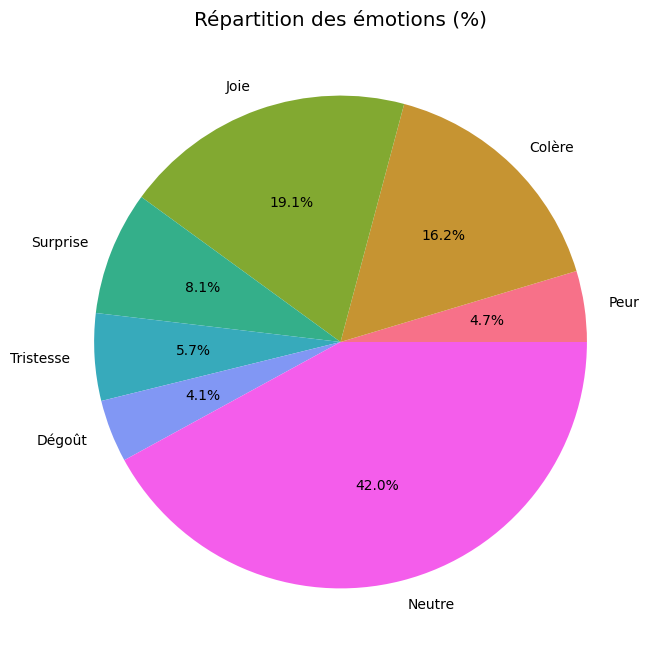

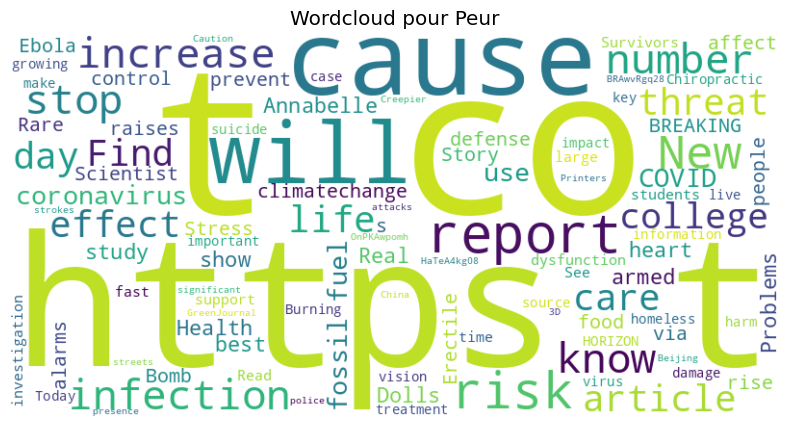

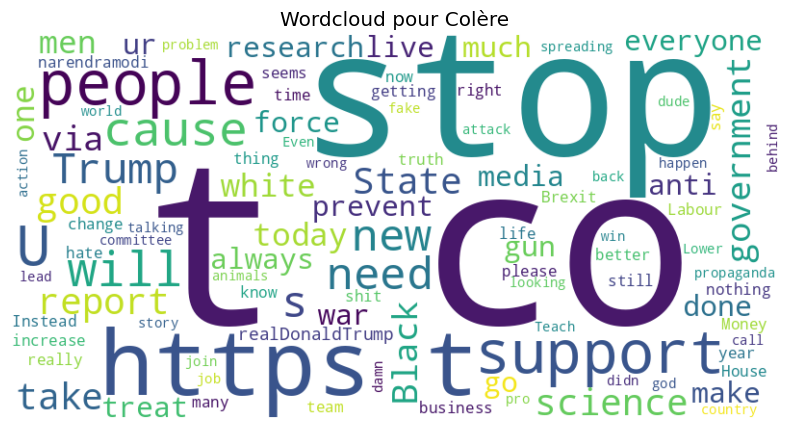

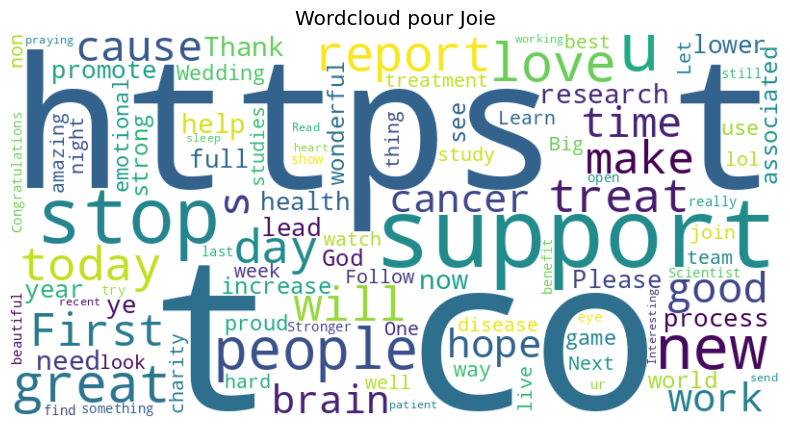

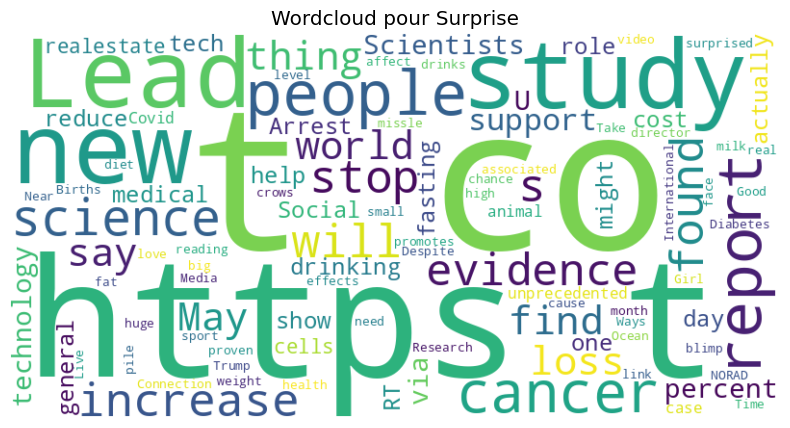

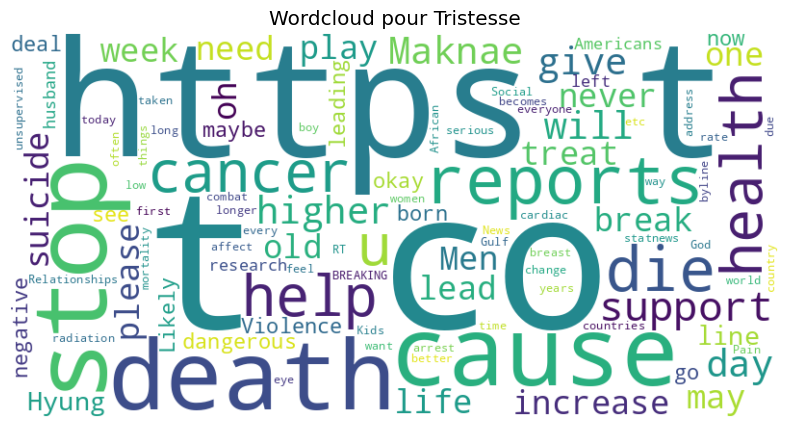

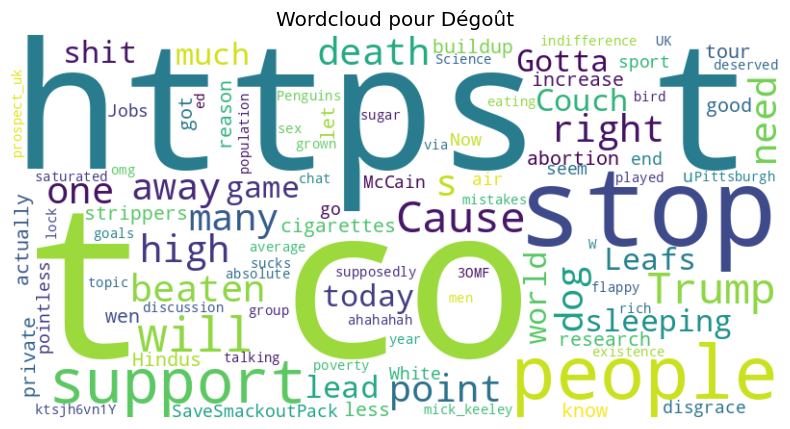

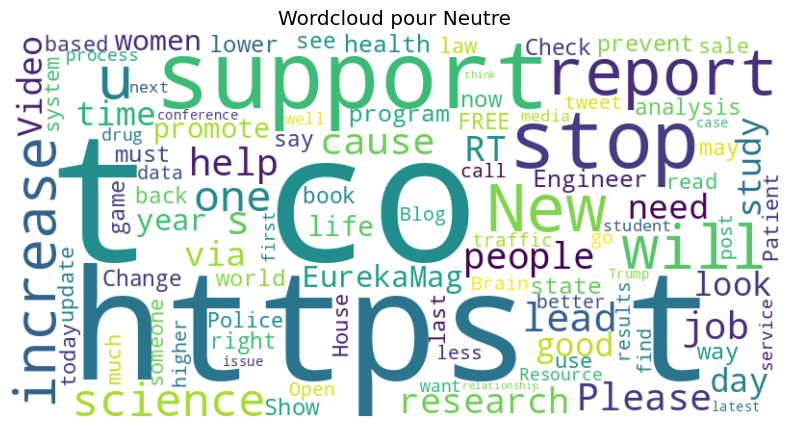


Exemple de texte nettoyé et prétraité :
                                                text  \
0  Knees are a bit sore. i guess that's a sign th...   
1          McDonald's breakfast stop then the gym 🏀💪   
2  Can any Gynecologist with Cancer Experience ex...   
3  Couch-lock highs lead to sleeping in the couch...   
4  Does daily routine help prevent problems with ...   

                                        cleaned_text  \
0  knees are a bit sore i guess that s a sign tha...   
1  mcdonald s breakfast stop then the gym basketb...   
2  can any gynecologist with cancer experience ex...   
3  couch lock highs lead to sleeping in the couch...   
4  does daily routine help prevent problems with ...   

                                      processed_text  
0  knee bit sore guess sign recent treadmilling w...  
1  mcdonald breakfast stop gym basketball flexed_...  
2  gynecologist cancer experience explain danger ...  
3  couch lock high lead sleeping couch got stop shit  
4  daily r

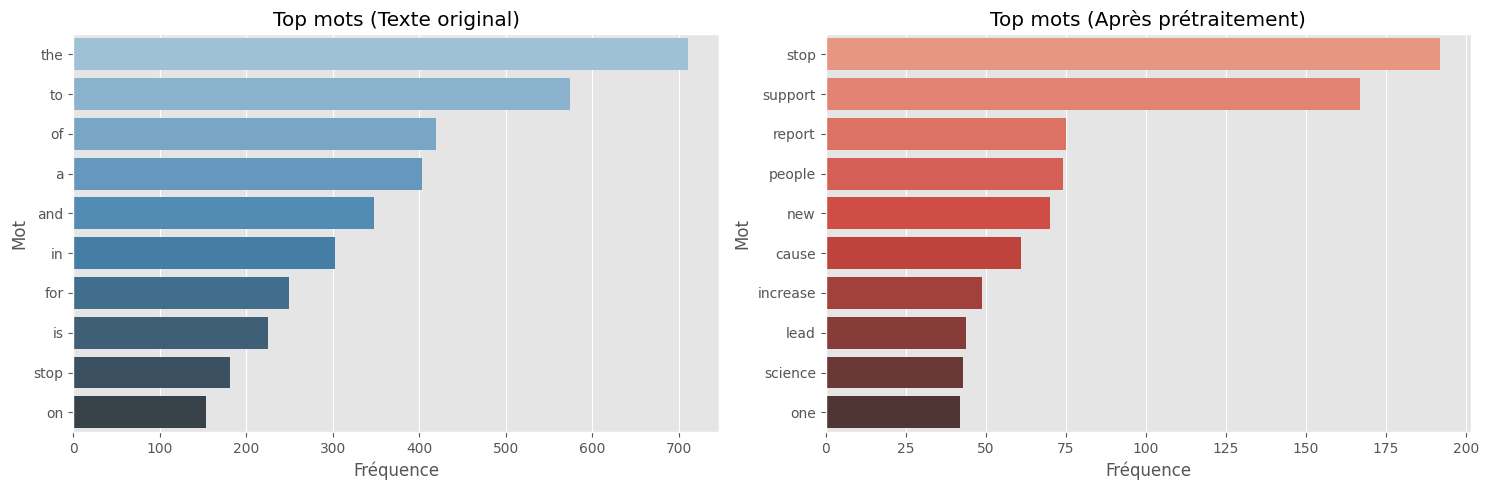


Top 10 mots (Texte original) :
    Mot  Fréquence
0   the        711
1    to        574
2    of        419
3     a        403
4   and        348
5    in        303
6   for        249
7    is        225
8  stop        181
9    on        154

Top 10 mots (Après prétraitement) :
        Mot  Fréquence
0      stop        192
1   support        167
2    report         75
3    people         74
4       new         70
5     cause         61
6  increase         49
7      lead         44
8   science         43
9       one         42
Nouveau nombre de tweets après augmentation : 1622
Bloc 1 terminé : Installation, chargement, prétraitement, et analyse exploratoire.


In [9]:
!pip install nltk
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng') # Download missing package

# Import the necessary libraries
import nlpaug.augmenter.word as naw

# Data Augmentation with nlpaug
aug = naw.SynonymAug(aug_src='wordnet', aug_p=0.3) # You can adjust the augmentation parameters as needed
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud
from google.colab import drive
import sys
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sentence_transformers import SentenceTransformer
import nlpaug.augmenter.word as naw

# Téléchargement des ressources NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Configuration des graphiques
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette("husl")

# Montage de Google Drive
drive.mount('/content/gdrive/')
my_local_drive = '/content/gdrive/My Drive/Colab Notebooks/'
sys.path.append(my_local_drive)
%cd $my_local_drive
%pwd

# Chargement des données
df = pd.read_csv('Annotation_apres_mise_en_accord_a_utiliser_pour_entrainement_modele.tsv', sep='\t')
print(f"Nombre total de tweets : {len(df)}")

# Vérification des colonnes
print("\nColonnes du dataset :")
print(df.columns)

# Identification automatique de la colonne des labels
possible_label_columns = [col for col in df.columns if 'emotion' in col.lower() or 'label' in col.lower()]
if len(possible_label_columns) == 1:
    label_column = possible_label_columns[0]
    print(f"Colonne des labels détectée : {label_column}")
else:
    raise ValueError("Impossible de détecter la colonne des labels.")

# Vérification des valeurs manquantes
print("\nValeurs manquantes :")
print(df.isnull().sum())

# Définition des correspondances des émotions
label_map = {
    1: 'Peur',
    2: 'Colère',
    3: 'Joie',
    4: 'Surprise',
    5: 'Tristesse',
    6: 'Dégoût',
    7: 'Neutre'
}

# Distribution des émotions
print("\nDistribution des émotions :")
emotion_counts = df[label_column].value_counts().sort_index()
emotion_counts.index = [label_map[i] for i in emotion_counts.index]
print(emotion_counts)

# Visualisation - Diagramme en barres
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.values, y=emotion_counts.index, hue=emotion_counts.index, palette="husl")
plt.title("Distribution des émotions")
plt.xlabel("Nombre de tweets")
plt.ylabel("Émotion")
plt.show()

# Visualisation - Diagramme en anneau
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts.values, labels=emotion_counts.index, autopct='%1.1f%%', colors=sns.color_palette("husl", len(emotion_counts)))
plt.title("Répartition des émotions (%)")
plt.show()

# Wordcloud par émotion
for emotion_id, emotion_name in label_map.items():
    text = ' '.join(df[df[label_column] == emotion_id]['text'].dropna())
    if len(text) > 0:
        wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Wordcloud pour {emotion_name}")
        plt.axis('off')
        plt.show()

# Prétraitement des données
stop_words = set(stopwords.words('english'))
stop_words.update(['url', 'http', 'https', 'www'])
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = emoji.demojize(text, delimiters=(" ", " "))
    # Garder les emojis émotionnels, supprimer les autres
    text = re.sub(r'emoji_[a-z]+(_[a-z]+)*', lambda m: m.group(0) if 'smile' in m.group(0) or 'sad' in m.group(0) or 'angry' in m.group(0) or 'fear' in m.group(0) else '', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def process_text_with_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 2]
    return ' '.join(filtered_tokens)

df['cleaned_text'] = df['text'].apply(clean_text)
df['processed_text'] = df['cleaned_text'].apply(process_text_with_stopwords)
df['cleaned_text'] = df['cleaned_text'].fillna('')
df['processed_text'] = df['processed_text'].fillna('')

print("\nExemple de texte nettoyé et prétraité :")
print(df[['text', 'cleaned_text', 'processed_text']].head())

initial_count = len(df)
df = df[df['cleaned_text'].str.strip() != '']
df = df[df['cleaned_text'].str.len() >= 10]
print(f"\nTweets supprimés (vides ou trop courts) : {initial_count - len(df)}")
print(f"Nombre de tweets restants : {len(df)}")

# Comparaison des top mots
def compare_top_words(df, n=10):
    original_words = ' '.join(df['text'].dropna()).lower().split()
    processed_words = ' '.join(df['processed_text'].dropna()).lower().split()
    original_freq = Counter(original_words).most_common(n)
    processed_freq = Counter(processed_words).most_common(n)
    orig_df = pd.DataFrame(original_freq, columns=['Mot', 'Fréquence'])
    proc_df = pd.DataFrame(processed_freq, columns=['Mot', 'Fréquence'])
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.barplot(data=orig_df, x='Fréquence', y='Mot', ax=axes[0], hue='Mot', palette="Blues_d", legend=False)
    axes[0].set_title('Top mots (Texte original)')
    sns.barplot(data=proc_df, x='Fréquence', y='Mot', ax=axes[1], hue='Mot', palette="Reds_d", legend=False)
    axes[1].set_title('Top mots (Après prétraitement)')
    plt.tight_layout()
    plt.show()
    print(f"\nTop {n} mots (Texte original) :\n{orig_df}")
    print(f"\nTop {n} mots (Après prétraitement) :\n{proc_df}")

print("\n=== Comparaison des top mots avant/après prétraitement ===")
compare_top_words(df)

# Data Augmentation avec nlpaug
aug = naw.SynonymAug(aug_src='wordnet', aug_p=0.3)
augmented_data = []
for label in [1, 4, 5, 6]:  # Peur, Surprise, Tristesse, Dégoût
    class_texts = df[df[label_column] == label]['cleaned_text'].tolist()
    for text in class_texts:
        augmented_texts = aug.augment(text, n=2)  # Générer 2 paraphrases
        for aug_text in augmented_texts:
            augmented_data.append({'cleaned_text': aug_text, 'label': label - 1})

augmented_df = pd.DataFrame(augmented_data)
df = pd.concat([df, augmented_df], ignore_index=True)
print(f"Nouveau nombre de tweets après augmentation : {len(df)}")

print("Bloc 1 terminé : Installation, chargement, prétraitement, et analyse exploratoire.")

In [11]:
# Conversion des labels (1 à 7 -> 0 à 6)
df['label'] = df[label_column] - 1

# Handle NaN values in the 'label' column before splitting
# You can either drop rows with NaN labels:
df.dropna(subset=['label'], inplace=True)
# or fill them with a specific value (e.g., -1):
# df['label'].fillna(-1, inplace=True)

# Séparation train/test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
print(f"Taille de l'ensemble d'entraînement : {len(train_df)}")
print(f"Taille de l'ensemble de test : {len(test_df)}")

# Extraction des embeddings avec Sentence Transformers
print("Chargement du modèle SentenceTransformer...")
embedder = SentenceTransformer('paraphrase-MiniLM-L6-v2')
X_train = embedder.encode(train_df['cleaned_text'].tolist(), show_progress_bar=True)
X_test = embedder.encode(test_df['cleaned_text'].tolist(), show_progress_bar=True)
y_train = train_df['label'].values
y_test = test_df['label'].values

# Application de SMOTE
smote = SMOTE(random_state=42, sampling_strategy={0: 400, 1: 400, 2: 400, 3: 400, 4: 400, 5: 400})
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f"Nouveau dataset après SMOTE : {len(X_train_resampled)} exemples")

# Conversion en tenseurs
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Création des datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Calcul des poids des classes
class_counts = pd.Series(y_train_resampled).value_counts().sort_index()
total_samples = len(y_train_resampled)
class_weights = torch.tensor([total_samples / (len(class_counts) * count) for count in class_counts]).to('cuda' if torch.cuda.is_available() else 'cpu')
print("\nPoids des classes :")
for i, weight in enumerate(class_weights):
    print(f"{label_map[i+1]} : {weight:.3f}")

# Définition de la perte focale
class FocalLoss(torch.nn.Module):
    def __init__(self, alpha=1, gamma=1.5, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        ce_loss = torch.nn.CrossEntropyLoss(reduction='none')(inputs, targets)
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * ce_loss
        if self.reduction == 'mean':
            return focal_loss.mean()
        return focal_loss.sum()

# Définition du modèle MLP
class MLPClassifier(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim, dropout=0.6):
        super(MLPClassifier, self).__init__()
        self.fc1 = torch.nn.Linear(input_dim, hidden_dim1)
        self.fc2 = torch.nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = torch.nn.Linear(hidden_dim2, output_dim)
        self.relu = torch.nn.ReLU()
        self.dropout = torch.nn.Dropout(dropout)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Hyperparamètres
INPUT_DIM = X_train_resampled.shape[1]  # 384 (dimension des embeddings)
HIDDEN_DIM1 = 256
HIDDEN_DIM2 = 128
OUTPUT_DIM = 7
DROPOUT = 0.6

# Initialisation du modèle
model = MLPClassifier(INPUT_DIM, HIDDEN_DIM1, HIDDEN_DIM2, OUTPUT_DIM, DROPOUT)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(f"Modèle chargé : MLP sur {device}")

# Configuration de l'entraînement
NUM_EPOCHS = 20  # Augmenté
BATCH_SIZE = 32
LEARNING_RATE = 2e-4  # Augmenté
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = FocalLoss(alpha=1, gamma=1.5)

print("Configuration de l'entraînement terminée.")
print("Bloc 2 terminé : Préparation et configuration du modèle.")

Taille de l'ensemble d'entraînement : 892
Taille de l'ensemble de test : 224
Chargement du modèle SentenceTransformer...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.51k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/28 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Nouveau dataset après SMOTE : 2774 exemples

Poids des classes :
Peur : 0.991
Colère : 0.991
Joie : 0.991
Surprise : 0.991
Tristesse : 0.991
Dégoût : 0.991
Neutre : 1.060
Modèle chargé : MLP sur cpu
Configuration de l'entraînement terminée.
Bloc 2 terminé : Préparation et configuration du modèle.


Début de l'entraînement MLP...
Époque 1/20, Perte moyenne: 1.5246
Évaluation - F1: 0.2165, Accuracy: 0.1964
Époque 2/20, Perte moyenne: 1.4339
Évaluation - F1: 0.3355, Accuracy: 0.2991
Époque 3/20, Perte moyenne: 1.2114
Évaluation - F1: 0.2893, Accuracy: 0.3170
Époque 4/20, Perte moyenne: 0.9220
Évaluation - F1: 0.3452, Accuracy: 0.3616
Époque 5/20, Perte moyenne: 0.7493
Évaluation - F1: 0.3519, Accuracy: 0.3705
Époque 6/20, Perte moyenne: 0.6391
Évaluation - F1: 0.4158, Accuracy: 0.4107
Époque 7/20, Perte moyenne: 0.5491
Évaluation - F1: 0.4080, Accuracy: 0.4107
Époque 8/20, Perte moyenne: 0.4912
Évaluation - F1: 0.4070, Accuracy: 0.4107
Époque 9/20, Perte moyenne: 0.4390
Évaluation - F1: 0.4386, Accuracy: 0.4375
Époque 10/20, Perte moyenne: 0.3870
Évaluation - F1: 0.4497, Accuracy: 0.4464
Époque 11/20, Perte moyenne: 0.3490
Évaluation - F1: 0.4318, Accuracy: 0.4286
Époque 12/20, Perte moyenne: 0.3364
Évaluation - F1: 0.4295, Accuracy: 0.4286
Époque 13/20, Perte moyenne: 0.2981
Évalua

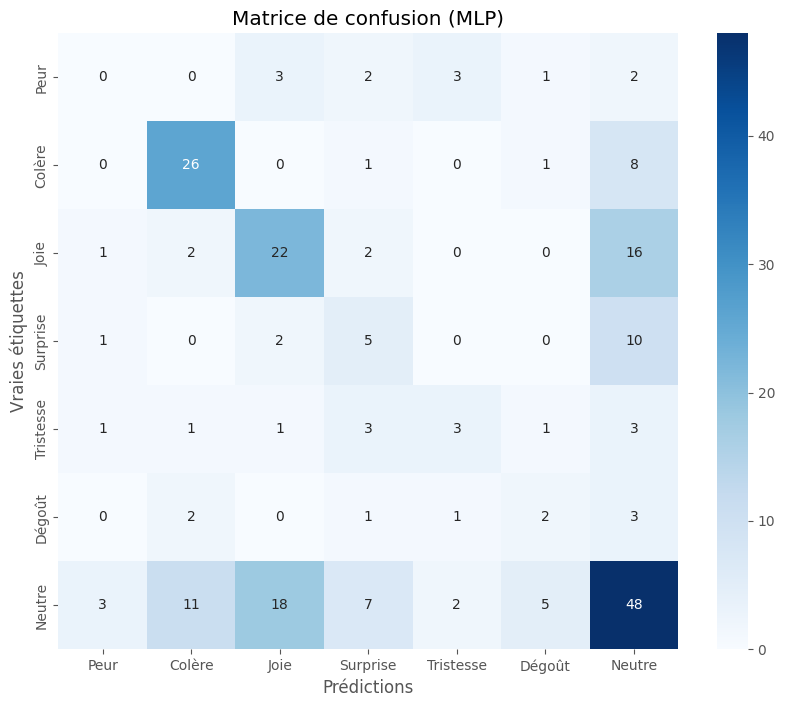


=== Validation K-Fold (5 folds) pour MLP ===

Fold 1/5
Fold 1 - F1: 0.4513, Accuracy: 0.4554

Fold 2/5
Fold 2 - F1: 0.5076, Accuracy: 0.5112

Fold 3/5
Fold 3 - F1: 0.4556, Accuracy: 0.4574

Fold 4/5
Fold 4 - F1: 0.4346, Accuracy: 0.4350

Fold 5/5
Fold 5 - F1: 0.4635, Accuracy: 0.4619

Résultats K-Fold moyens (5 folds) :
F1 moyen: 0.4625 (+/- 0.0488)
Accuracy moyen: 0.4642 (+/- 0.0505)

Exemples de tweets mal classés :
Texte: the number of lies told by men would decrease significantly if women stopped asking questions
Prédit: Neutre, Vrai: Colère

Texte: this is how islam isis muslim obamas brotherhood treat woman hillaryclinton took from these countries
Prédit: Colère, Vrai: Colère

Texte: first gig of 2015 at barcornerstone didcot with support from the excellent theaugustlist fri 6 feb duotonemusic
Prédit: Joie, Vrai: Joie

Texte: fliggenkrunker any idea why smash 4 had a huge increase yesterday like 14 entrants out of nowhere
Prédit: Surprise, Vrai: Surprise

Texte: scientists unloc

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Prédictions pour les nouveaux tweets :
Tweet: I am so happy today, I got a promotion!
Émotion prédite: Joie

Tweet: This is disgusting, how could they do that?
Émotion prédite: Colère

Tweet: I am really scared about the upcoming exam.
Émotion prédite: Neutre

Bloc 3 terminé : Entraînement, évaluation, K-Fold, et prédiction.


In [12]:
# Entraînement
print("Début de l'entraînement MLP...")
for epoch in range(NUM_EPOCHS):
    model.train()
    total_loss = 0
    for batch in train_loader:
        features, labels = batch
        features, labels = features.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    print(f"Époque {epoch+1}/{NUM_EPOCHS}, Perte moyenne: {avg_loss:.4f}")

    # Évaluation
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in test_loader:
            features, labels = batch
            features, labels = features.to(device), labels.to(device)
            outputs = model(features)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    f1 = f1_score(all_labels, all_preds, average='weighted')
    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Évaluation - F1: {f1:.4f}, Accuracy: {accuracy:.4f}")

# Rapport final
print("\nRapport de classification :")
print(classification_report(all_labels, all_preds, target_names=[label_map[i+1] for i in range(7)], zero_division=0))

# Matrice de confusion
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[label_map[i+1] for i in range(7)], yticklabels=[label_map[i+1] for i in range(7)])
plt.title("Matrice de confusion (MLP)")
plt.xlabel("Prédictions")
plt.ylabel("Vraies étiquettes")
plt.show()

# Validation K-Fold
use_kfold = True
n_splits = 5

if use_kfold:
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    def train_and_evaluate_fold(train_idx, val_idx):
        train_fold = df.iloc[train_idx]
        val_fold = df.iloc[val_idx]
        X_train_fold = embedder.encode(train_fold['cleaned_text'].tolist(), show_progress_bar=False)
        y_train_fold = train_fold['label'].values
        X_val_fold = embedder.encode(val_fold['cleaned_text'].tolist(), show_progress_bar=False)
        y_val_fold = val_fold['label'].values
        # SMOTE
        X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)
        # Conversion en tenseurs
        X_train_tensor = torch.tensor(X_train_fold_resampled, dtype=torch.float)
        y_train_tensor = torch.tensor(y_train_fold_resampled, dtype=torch.long)
        X_val_tensor = torch.tensor(X_val_fold, dtype=torch.float)
        y_val_tensor = torch.tensor(y_val_fold, dtype=torch.long)
        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
        train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
        model = MLPClassifier(INPUT_DIM, HIDDEN_DIM1, HIDDEN_DIM2, OUTPUT_DIM, DROPOUT).to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
        criterion = FocalLoss(alpha=1, gamma=1.5)
        for epoch in range(NUM_EPOCHS):
            model.train()
            for batch in train_loader:
                features, labels = batch
                features, labels = features.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(features)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
        model.eval()
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for batch in val_loader:
                features, labels = batch
                features, labels = features.to(device), labels.to(device)
                outputs = model(features)
                preds = torch.argmax(outputs, dim=1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        f1 = f1_score(all_labels, all_preds, average='weighted')
        accuracy = accuracy_score(all_labels, all_preds)
        return f1, accuracy

    print(f"\n=== Validation K-Fold ({n_splits} folds) pour MLP ===")
    f1_scores = []
    accuracy_scores = []
    for fold, (train_idx, val_idx) in enumerate(kf.split(df)):
        print(f"\nFold {fold+1}/{n_splits}")
        f1, accuracy = train_and_evaluate_fold(train_idx, val_idx)
        f1_scores.append(f1)
        accuracy_scores.append(accuracy)
        print(f"Fold {fold+1} - F1: {f1:.4f}, Accuracy: {accuracy:.4f}")
    print(f"\nRésultats K-Fold moyens ({n_splits} folds) :")
    print(f"F1 moyen: {np.mean(f1_scores):.4f} (+/- {np.std(f1_scores) * 2:.4f})")
    print(f"Accuracy moyen: {np.mean(accuracy_scores):.4f} (+/- {np.std(accuracy_scores) * 2:.4f})")

# Analyse des erreurs
results_df = test_df.copy()
results_df['predicted_label'] = np.array(all_preds) + 1
results_df['predicted_emotion'] = results_df['predicted_label'].map(label_map)
print("\nExemples de tweets mal classés :")
errors = results_df[results_df['label'] != results_df['predicted_label']]
for idx, row in errors[['cleaned_text', 'predicted_emotion', label_column]].head(5).iterrows():
    print(f"Texte: {row['cleaned_text']}")
    print(f"Prédit: {row['predicted_emotion']}, Vrai: {label_map[row[label_column]]}\n")

# Sauvegarde
torch.save(model.state_dict(), './mlp_sentence_transformer_optimized.pt')
print("Modèle MLP sauvegardé dans ./mlp_sentence_transformer_optimized.pt")
df.to_csv('scitweets_processed_emotions.csv', index=False)
print("Données prétraitées sauvegardées dans scitweets_processed_emotions.csv")
results_df.to_csv('emotion_predictions.csv', index=False)
print("Prédictions sauvegardées dans emotion_predictions.csv")

# Prédiction sur nouveaux tweets
model.eval()
new_tweets = [
    "I am so happy today, I got a promotion!",
    "This is disgusting, how could they do that?",
    "I am really scared about the upcoming exam."
]
cleaned_tweets = [clean_text(tweet) for tweet in new_tweets]
X_new = embedder.encode(cleaned_tweets, show_progress_bar=True)
X_new_tensor = torch.tensor(X_new, dtype=torch.float).to(device)
with torch.no_grad():
    outputs = model(X_new_tensor)
    predictions = torch.argmax(outputs, dim=1)
predicted_emotions = [label_map[pred.item() + 1] for pred in predictions]
print("\nPrédictions pour les nouveaux tweets :")
for tweet, emotion in zip(new_tweets, predicted_emotions):
    print(f"Tweet: {tweet}")
    print(f"Émotion prédite: {emotion}\n")

print("Bloc 3 terminé : Entraînement, évaluation, K-Fold, et prédiction.")